### Minor project 
#### Name: Saravanan H 
#### email: hsaravanan29@gmail.com

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import numpy as np
import seaborn as sns

In [2]:
df=read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.isnull().sum() 
# There are no null row in the dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Detecting Outliers using Z score

In [4]:
def outlier_detection(data):
    outliers=[]
    t=3
    mean=np.mean(data)
    std=np.std(data)
    count=0
    for x in data:
        count+=1
        z_score=(x-mean)/std
        if(np.abs(z_score)>t):
            outliers.append(count-1)
    return outliers
def outlier_removal(data,y):
    for x in data:
        y=y.drop(x)
    return y
    
df=outlier_removal(outlier_detection(df['math score']),df)
df=outlier_removal(outlier_detection(df['reading score']),df)
df=outlier_removal(outlier_detection(df['writing score']),df)
print(df)


     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

### Math Scores, Reading scores and Writing Scores

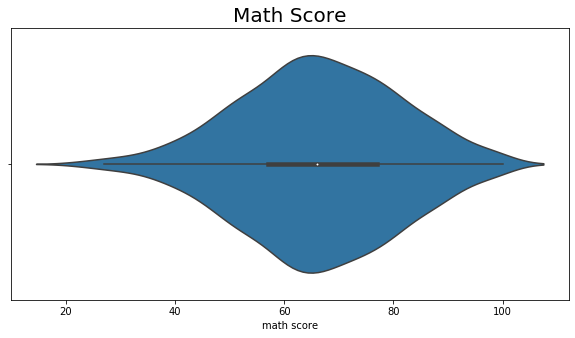

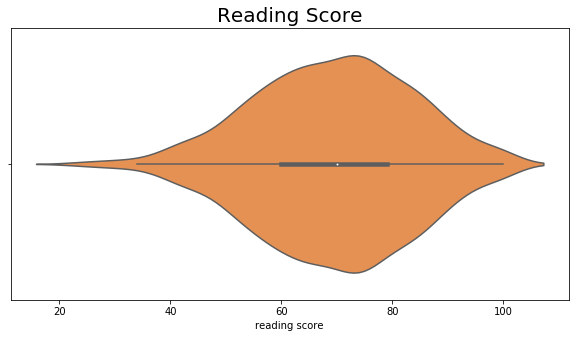

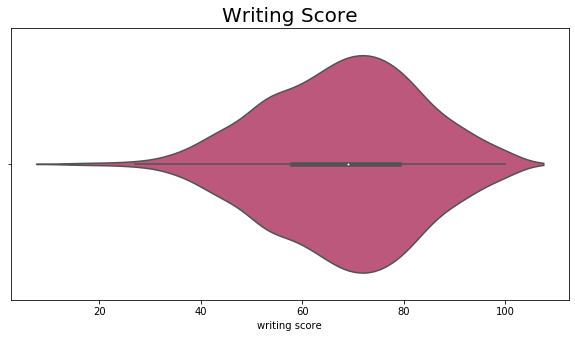

In [5]:
plt.rcParams['figure.figsize']=(10,5)

ax = sns.violinplot(x=df["math score"])
plt.title('Math Score',fontsize=20)
plt.show()

plt.rcParams['figure.figsize']=(10,5)
ax = sns.violinplot(x=df["reading score"],palette="YlOrRd_r")
plt.title('Reading Score',fontsize=20)
plt.show()
plt.rcParams['figure.figsize']=(10,5)
ax = sns.violinplot(x=df["writing score"],palette="plasma")
plt.title('Writing Score',fontsize=20)
plt.show()
# The plot below shows us that many students less marks. 
# What could be the reason for it?
# Is there any effect of gender or lunch or parental degree or test preparation course on their marks?

### Gender and Scores

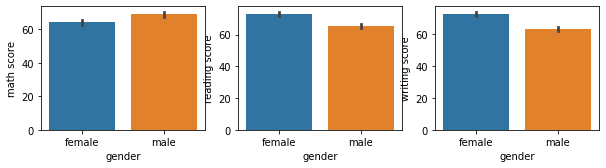

In [6]:
plt.figure()
plt.subplot(2,3,1)
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x="gender",y="math score",data=df)
plt.subplot(2,3,2)
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x="gender",y="reading score",data=df)
plt.subplot(2,3,3)
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x="gender",y="writing score",data=df)

# When we compare the gender and the marks in different subjects, male students gets more mark in math and female students in others

### Race/Ethnicity effects on scores

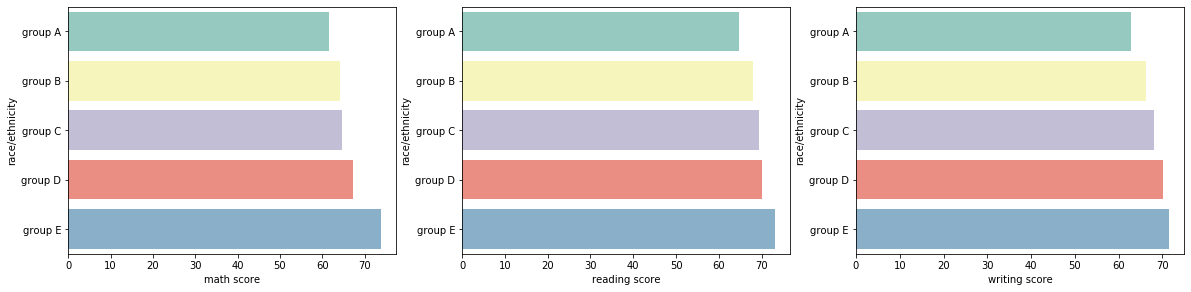

In [7]:
y=df.groupby(['race/ethnicity'], as_index=False).mean()
plt.figure()
plt.subplot(2,3,1)
sns.barplot(x="math score",y="race/ethnicity",data=y,palette="Set3")
plt.subplot(2,3,2)
sns.barplot(x="reading score",y="race/ethnicity",data=y,palette="Set3")
plt.subplot(2,3,3)
sns.barplot(x="writing score",y="race/ethnicity",data=y,palette="Set3")
#From the plot below, we can see group E students get better marks than all other students
#Hence we can say that race/ethnicity has overall effect on marks.

### Parental Education effects on scores

'We can see from the plots below that parential degree has effects on the marks of the students \n   as students with parental education just high school seem to get lesser marks than students with parental degree Master Degree \n'

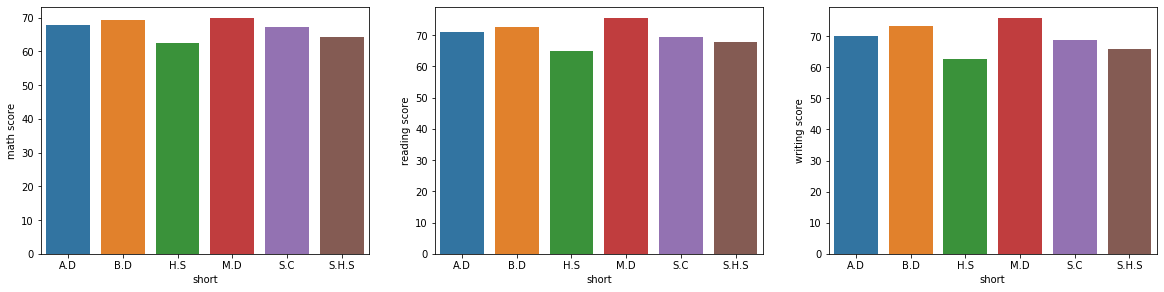

In [8]:
p=df.groupby(['parental level of education'], as_index=False).mean()
o=["A.D","B.D","H.S","M.D","S.C","S.H.S"]
p["short"]=o
plt.figure()
plt.subplot(2,3,1)
sns.barplot(x="short",y="math score",data=p)
plt.subplot(2,3,2)
sns.barplot(y="reading score",x="short",data=p)
plt.subplot(2,3,3)
sns.barplot(y="writing score",x="short",data=p)
"""We can see from the plots below that parential degree has effects on the marks of the students 
   as students with parental education just high school seem to get lesser marks than students with parental degree Master Degree 
"""


### Lunch effects on Scores

'As we can see below, Lunch seems to have significant effects on marks of the students'

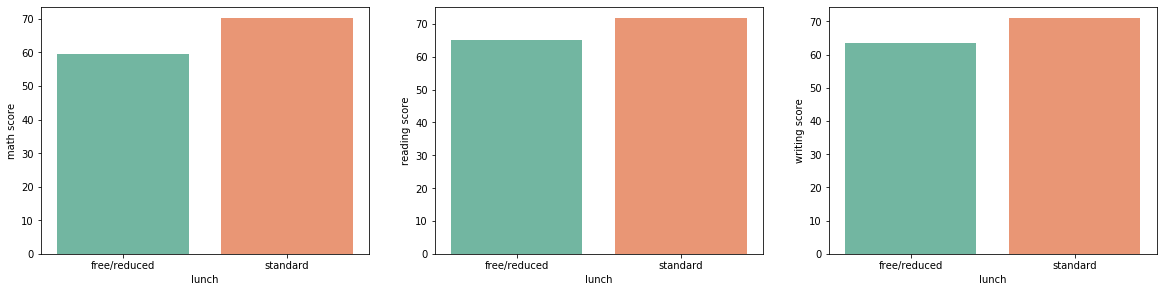

In [9]:
l=df.groupby(['lunch'], as_index=False).mean()
plt.figure()
sns.set_palette(sns.color_palette("Set2"))
plt.subplot(2,3,1)
sns.barplot(y="math score",x="lunch",data=l)
plt.subplot(2,3,2)
sns.barplot(y="reading score",x="lunch",data=l)
plt.subplot(2,3,3)
sns.barplot(y="writing score",x="lunch",data=l)
"""As we can see below, Lunch seems to have significant effects on marks of the students"""

"From the plot below we can say that, irrespective of the degree of the parents, if students have standard lunch they seem to get more scores than the students who have free lunch. Even though parent's degree do show effects on the scores, that is something out of control. Making sure students receive standard lunch could result in atleast 5 score increase."

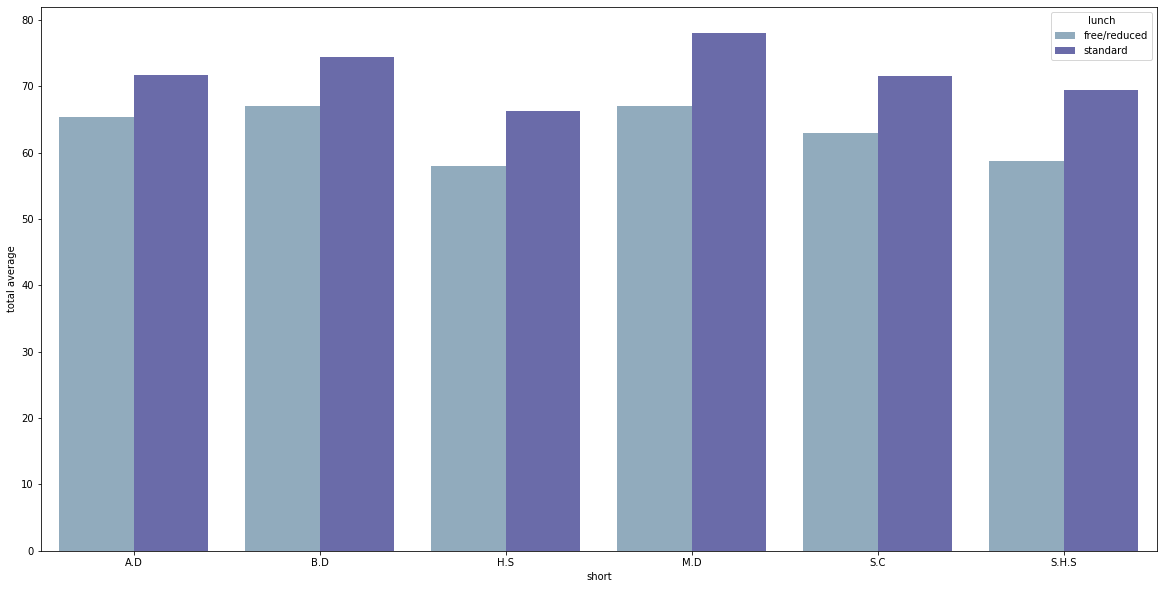

In [10]:
pl=df.groupby(['parental level of education','lunch'],as_index=False).mean()
o1=["A.D","A.D","B.D","B.D","H.S","H.S","M.D","M.D","S.C","S.C","S.H.S","S.H.S"]
pl["short"]=o1
sns.set_palette(sns.color_palette("twilight"))

total_avg=[]
for i in range(len(pl)):
    total_avg.append((pl["math score"][i]+pl["reading score"][i]+pl["writing score"][i])/3)
pl["total average"]=total_avg
sns.barplot(y="total average",x="short",hue="lunch", data=pl)

"""From the plot below we can say that, irrespective of the degree of the parents, if students have standard lunch they seem to get more scores than the students who have free lunch. Even though parent's degree do show effects on the scores, that is something out of control. Making sure students receive standard lunch could result in atleast 5 score increase."""


### Test Preparation Course on scores

'Test Preparation courses does increase the scores of students in all subjects'

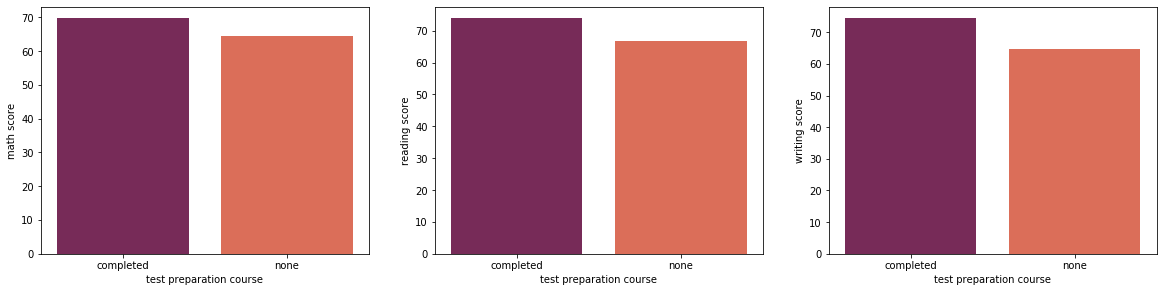

In [11]:
t=df.groupby(['test preparation course'], as_index=False).mean()
plt.figure()


plt.subplot(2,3,1)
sns.set_palette("Paired")
sns.barplot(x=t["test preparation course"], y=t["math score"], data=t,palette="rocket")
plt.subplot(2,3,2)

sns.barplot(x=t["test preparation course"], y=t["reading score"], data=t,palette="rocket");

plt.subplot(2,3,3)
sns.barplot(x=t["test preparation course"], y=t["writing score"], data=t,palette="rocket");

"""Test Preparation courses does increase the scores of students in all subjects"""

### Test preparation course with lunch vs Scores

'As per the plot below, making sure students have standard lunch and making them complete the preparation course can increase total marks significantly'

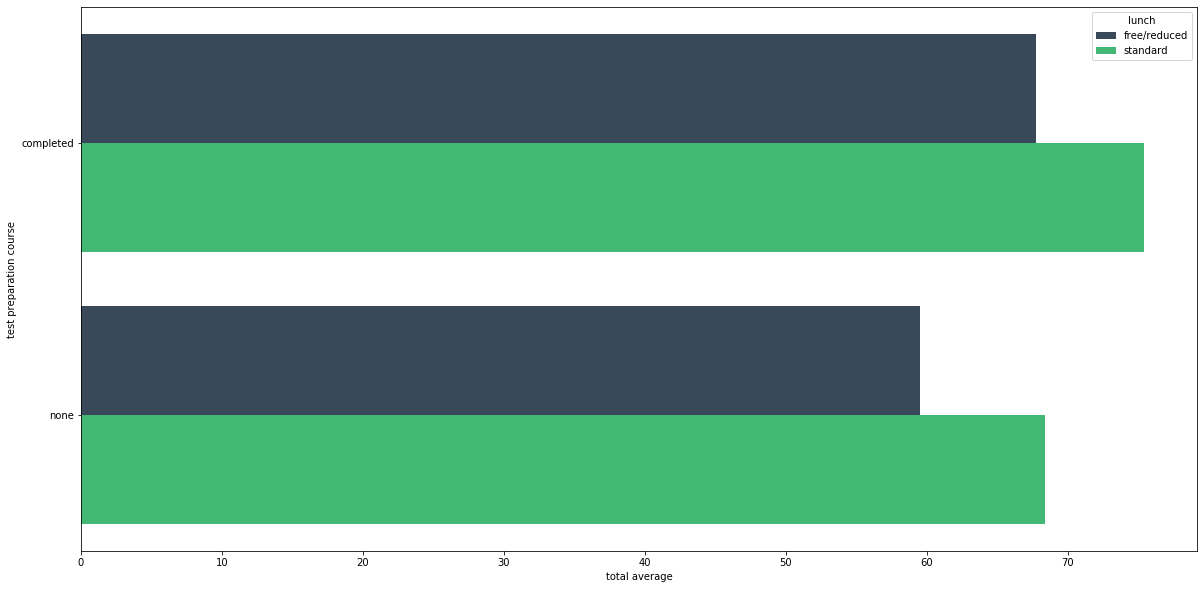

In [12]:
tf=df.groupby(['test preparation course','lunch'], as_index=False).mean()
total_avg=[]
c=["#34495e", "#2ecc71"]
for i in range(len(tf)):
    total_avg.append((tf["math score"][i]+tf["reading score"][i]+tf["writing score"][i])/3)
tf["total average"]=total_avg

sns.set_palette(c)
sns.barplot(tf["total average"],tf["test preparation course"],hue=tf["lunch"],data=tf)
"""As per the plot below, making sure students have standard lunch and making them complete the preparation course can increase total marks significantly"""

### Test Preparation course and gender vs scores

'From the plots below,The preparation course seems to be equally beneficial for both male and female students for all courses '

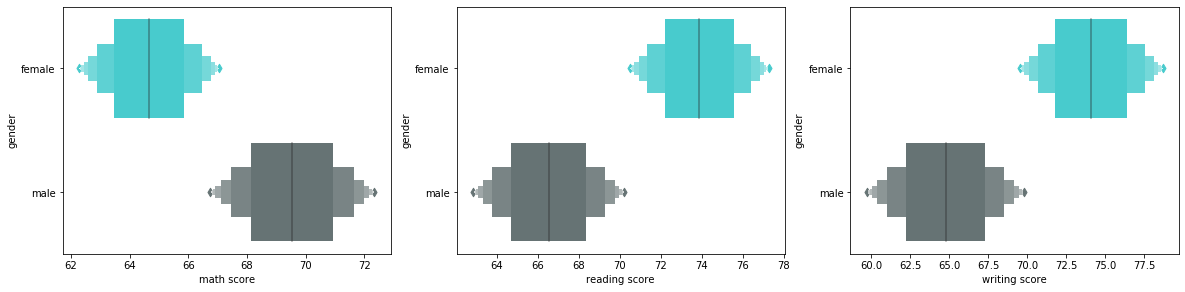

In [13]:
tg=df.groupby(['test preparation course','gender'], as_index=False).mean()
plt.figure()
c1=["#32e1e3","#637577"]
sns.set_palette(c1)
plt.subplot(2,3,1)
sns.boxenplot(x=tg["math score"], y=tg["gender"] ,data=tg);
plt.subplot(2,3,2)
sns.boxenplot(x=tg["reading score"], y=tg["gender"], data=tg);
plt.subplot(2,3,3)
sns.boxenplot(x=tg["writing score"], y=tg["gender"], data=tg);
"""From the plots below,The preparation course seems to be equally beneficial for both male and female students for all courses """

### Parental Education with  Races vs Scores

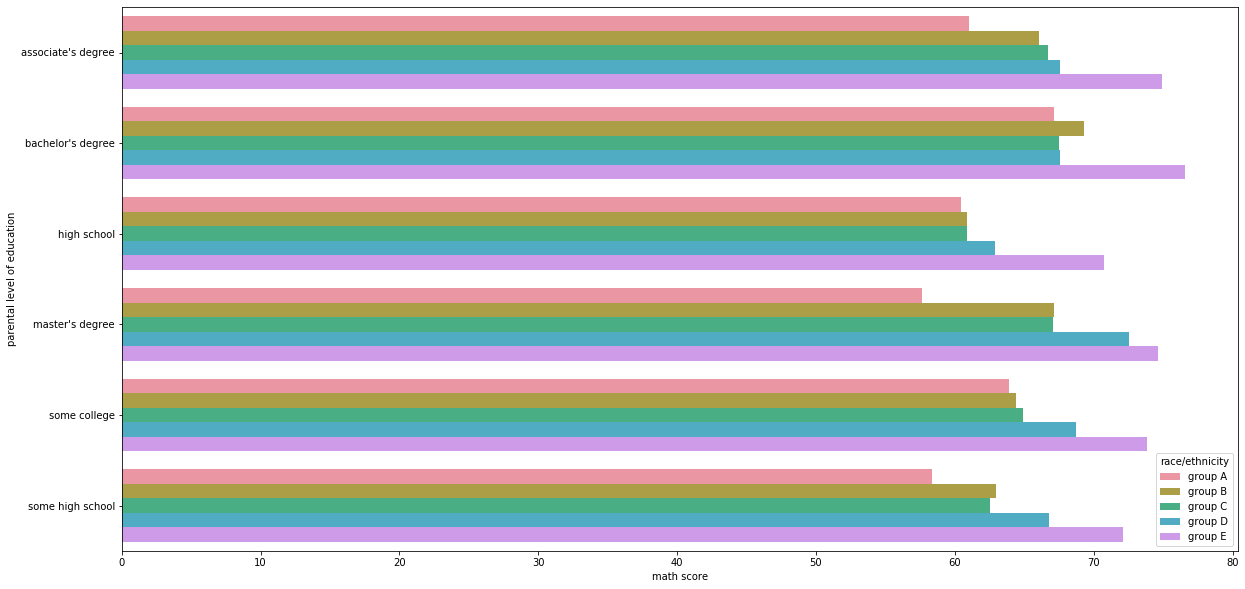

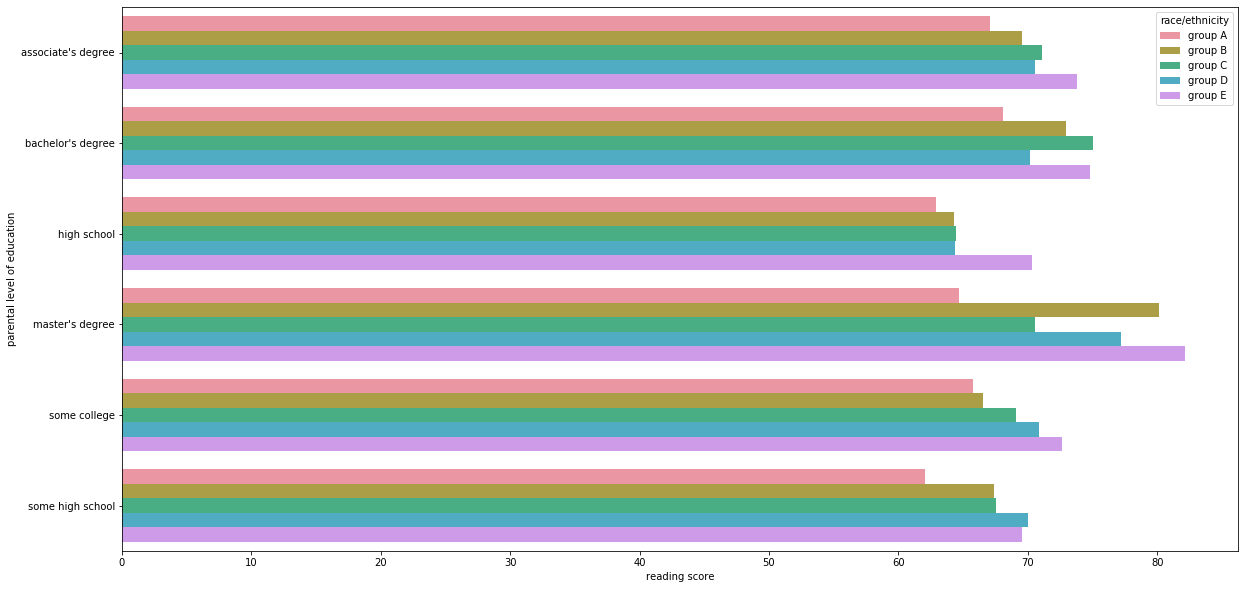

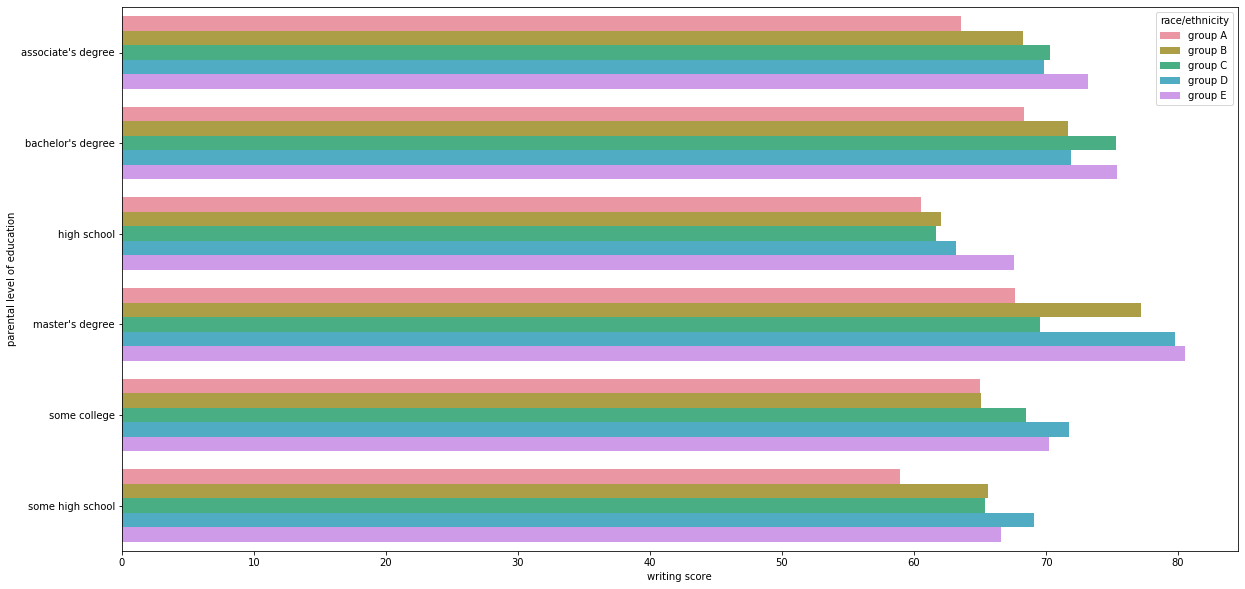

In [14]:
rp=df.groupby(['parental level of education','race/ethnicity'], as_index=False).mean()
plt.rcParams['figure.figsize']=(20,10)
"""From the plot below we can see that the race the student belong too has a 
huge impact on the math marks they get and the parental level of education doesn't matter much"""
sns.barplot(rp["math score"],rp["parental level of education"],hue=rp['race/ethnicity'],data=rp)
plt.show()
"""But as far as the reading score is as concerned, there is some impact of races and parental level of education on the marks"""

sns.barplot(rp["reading score"],rp["parental level of education"],hue=rp['race/ethnicity'],data=rp)
plt.show()
"""The writing score of the student is similar to the reading scores as they have almost equal impacts of races and education on the marks"""
sns.barplot(rp["writing score"],rp["parental level of education"],hue=rp['race/ethnicity'],data=rp)


### Races with gender vs Scores

'Races have significant effects on marks of both male and female students '

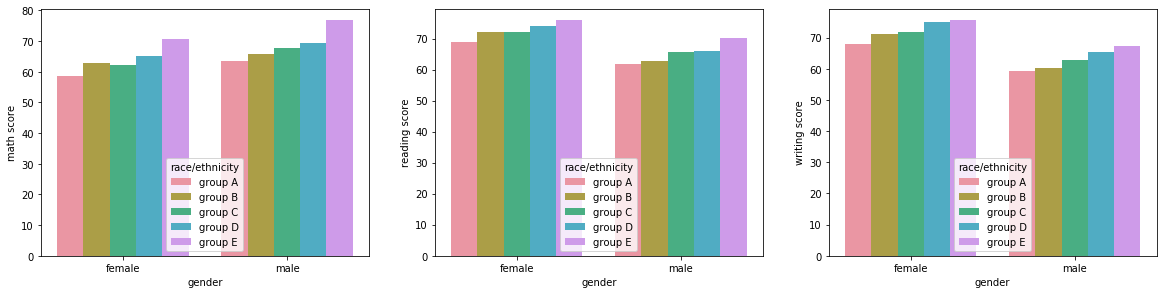

In [15]:
rg=df.groupby(['gender','race/ethnicity'], as_index=False).mean()
plt.figure()
plt.subplot(2,3,1)
sns.barplot(rg["gender"],rg["math score"],hue=rg['race/ethnicity'],data=rg)
plt.subplot(2,3,2)
sns.barplot(rg["gender"],rg["reading score"],hue=rg['race/ethnicity'],data=rg)
plt.subplot(2,3,3)
sns.barplot(rg["gender"],rg["writing score"],hue=rg['race/ethnicity'],data=rg)

"""Races have significant effects on marks of both male and female students """

### Gender and Lunch vs Scores

'Standard lunch helps students of both gender to score more marks'

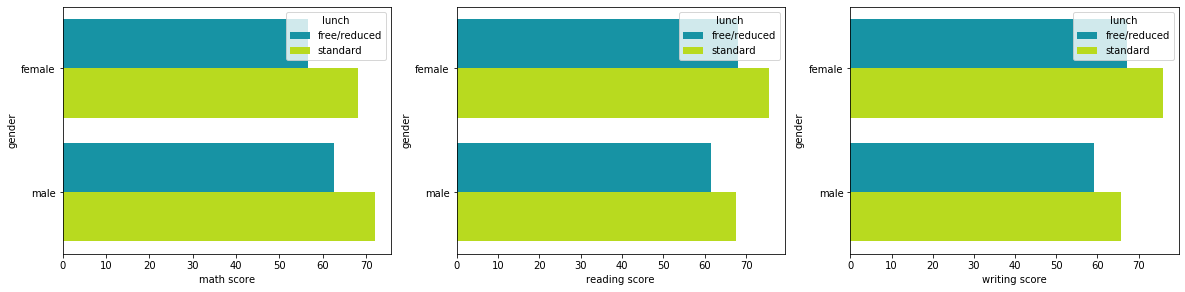

In [16]:
gl=df.groupby(['gender','lunch'], as_index=False).mean()
plt.figure()
plt.subplot(2,3,1)
sns. barplot(gl['math score'],gl['gender'],hue="lunch",data=gl,palette="nipy_spectral")
plt.subplot(2,3,2)
sns.barplot(gl['reading score'],gl['gender'],hue="lunch",data=gl,palette="nipy_spectral")
plt.subplot(2,3,3)
sns.barplot(gl['writing score'],gl['gender'],hue="lunch",data=gl,palette="nipy_spectral")

"""Standard lunch helps students of both gender to score more marks"""

### Races and lunch vs Scores

'From the plot below, we can see that standard lunch helps students get more marks irrespective of the races'

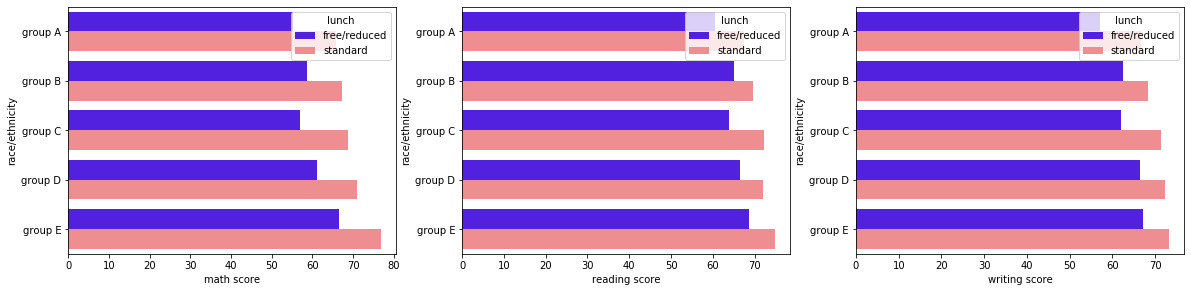

In [17]:
rl=df.groupby(['race/ethnicity','lunch'], as_index=False).mean()
plt.figure()
plt.subplot(2,3,1)
sns. barplot(rl['math score'],rl['race/ethnicity'],hue="lunch",data=rl,palette="gnuplot2")
plt.subplot(2,3,2)
sns.barplot(rl['reading score'],rl['race/ethnicity'],hue="lunch",data=rl,palette="gnuplot2")
plt.subplot(2,3,3)
sns.barplot(rl['writing score'],rl['race/ethnicity'],hue="lunch",data=rl,palette="gnuplot2")

"""From the plot below, we can see that standard lunch helps students get more marks irrespective of the races"""

### Races and Test preparation Course vs Scores

'From the plot below, we can see that preparatory course helps students get more marks irrespective of the races'

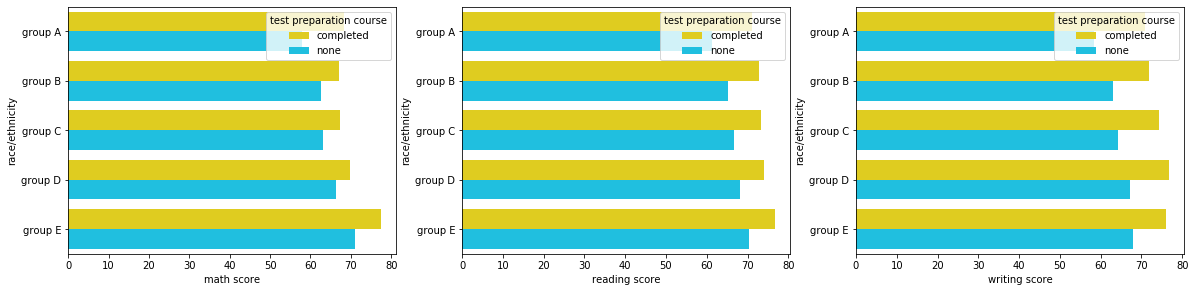

In [18]:
rp=df.groupby(['race/ethnicity','test preparation course'], as_index=False).mean()
plt.figure()
plt.subplot(2,3,1)
sns. barplot(rp['math score'],rp['race/ethnicity'],hue="test preparation course",data=rp,palette="jet_r")
plt.subplot(2,3,2)
sns.barplot(rp['reading score'],rp['race/ethnicity'],hue="test preparation course",data=rp,palette="jet_r")
plt.subplot(2,3,3)
sns.barplot(rp['writing score'],rp['race/ethnicity'],hue="test preparation course",data=rp,palette="jet_r")

"""From the plot below, we can see that preparatory course helps students get more marks irrespective of the races"""

### Gender and Test Preparation Course vs Scores

'From the plot below, we can see that preparatory course helps students get more marks irrespective of the gender'

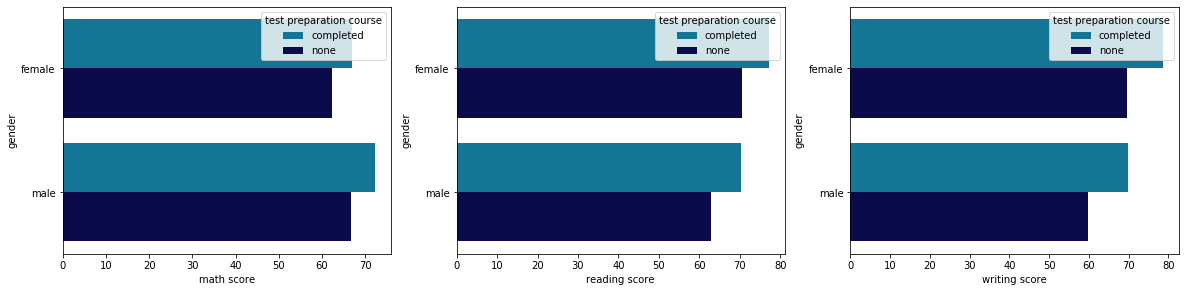

In [19]:
pg=df.groupby(['gender','test preparation course'], as_index=False).mean()
plt.figure()
plt.subplot(2,3,1)
sns. barplot(pg['math score'],pg['gender'],hue="test preparation course",data=pg,palette="ocean_r")
plt.subplot(2,3,2)
sns.barplot(pg['reading score'],pg['gender'],hue="test preparation course",data=pg,palette="ocean_r")
plt.subplot(2,3,3)
sns.barplot(pg['writing score'],pg['gender'],hue="test preparation course",data=pg,palette="ocean_r")

"""From the plot below, we can see that preparatory course helps students get more marks irrespective of the gender"""

### Parental level of education and Test preparation course vs Scores

'From the plot below, we can see that the test preparation course helps everyone get more scores irrespective of the parents level of education'

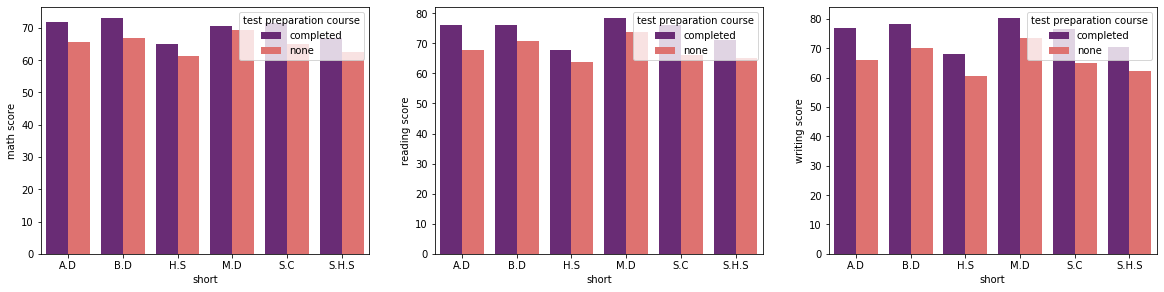

In [20]:
pt=df.groupby(['parental level of education','test preparation course'], as_index=False).mean()
plt.figure()

pt["short"]=o1
plt.subplot(2,3,1)
sns. barplot(pt['short'],pt['math score'],hue="test preparation course",data=pt,palette="magma")
plt.subplot(2,3,2)
sns.barplot(pt['short'],pt['reading score'],hue="test preparation course",data=pt,palette="magma")
plt.subplot(2,3,3)
sns.barplot(pt['short'],pt['writing score'],hue="test preparation course",data=pt,palette="magma")

"""From the plot below, we can see that the test preparation course helps everyone get more scores irrespective of the parents level of education"""

### Parental level of education and Lunch vs Scores

'From the plot below, we can see that the standard lunch helps everyone get more scores irrespective of the parents level of education'

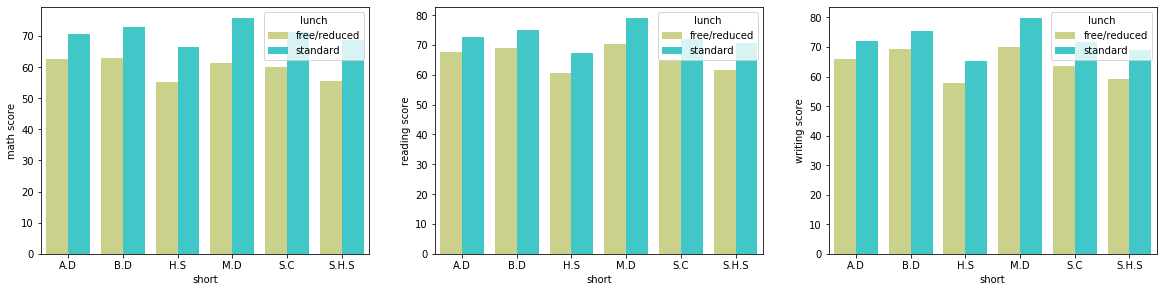

In [21]:
pl=df.groupby(['parental level of education','lunch'], as_index=False).mean()
plt.figure()
pl["short"]=o1
plt.subplot(2,3,1)
sns. barplot(pl['short'],pl['math score'],hue="lunch",data=pl,palette="rainbow_r")
plt.subplot(2,3,2)
sns.barplot(pl['short'],pl['reading score'],hue="lunch",data=pl,palette="rainbow_r")
plt.subplot(2,3,3)
sns.barplot(pl['short'],pl['writing score'],hue="lunch",data=pl,palette="rainbow_r")
"""From the plot below, we can see that the standard lunch helps everyone get more scores irrespective of the parents level of education"""

### Inferences

In [22]:
"""
1. Male students are better in math and the female students are better in reading and writing overall
2. Students belonging to Group E are the ones who score the highest marks. Followed by Group D which is then followed by Group 
   C, then Group B and then Group A except female students from Group C seem to score more in math than the female students of 
   Group E.
3. Parential level of Education does seem to have an significant effect on scores in reading and writing but not much 
   in math scores
4. Providing standard lunch helps everyone get more scores irrespective of the parents level of education,races/ethnicity and 
   gender of the students.
5. Also the test preparation course helps all students to get more scores irrespective of the parents level of education,races/ethnicity and 
   gender of the students.

"""

'\n1. Male students are better in math and the female students are better in reading and writing overall\n2. Students belonging to Group E are the ones who score the highest marks. Followed by Group D which is then followed by Group \n   C, then Group B and then Group A except female students from Group C seem to score more in math than the female students of \n   Group E.\n3. Parential level of Education does seem to have an significant effect on scores in reading and writing but not much \n   in math scores\n4. Providing standard lunch helps everyone get more scores irrespective of the parents level of education,races/ethnicity and \n   gender of the students.\n5. Also the test preparation course helps all students to get more scores irrespective of the parents level of education,races/ethnicity and \n   gender of the students.\n\n'